<a href="https://colab.research.google.com/github/piyudhorey1/Deep_Learning/blob/Developer-pd/Neural_Network_Regression__with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [2]:
# import tensorflow

import tensorflow as tf
print(tf.__version__)

2.12.0


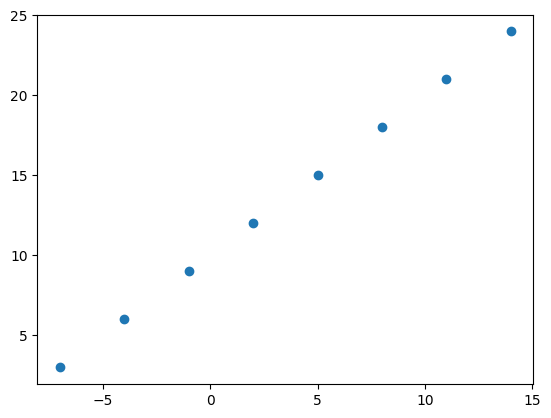

In [3]:
# Create data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y)

# Input and output shapes


In [4]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([936400])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([936400], dtype=int32)>)

In [5]:
# checking shape of X, y

input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X.ndim

1

In [7]:
# Turn our numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

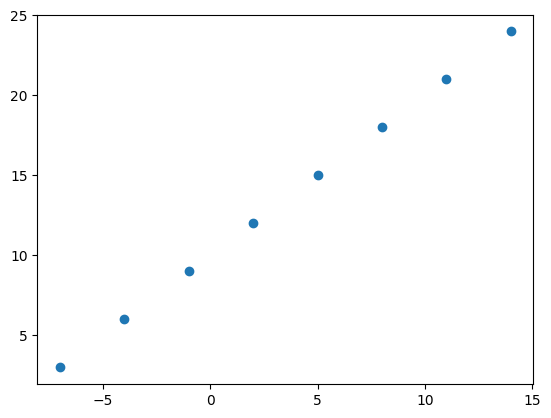

In [8]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow

 1. __Creating a model__ - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning). <br>
 2. __Compiling a model__ - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). <br>
 3. __Fitting a model__ - letting the model try to find patterns in the data (how does X get to y).  

In [9]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model.compile(loss=tf.keras.losses.mae, # Mean absolue error
              optimizer= tf.keras.optimizers.SGD(), # stochastic gradient descent)
              metrics= ['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 12.9365 - mae: 12.9365
Epoch 2/5
1/1 [==============================] - 0s 38ms/step - loss: 12.8040 - mae: 12.8040
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 12.6715 - mae: 12.6715
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 12.5390 - mae: 12.5390
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 12.4065 - mae: 12.4065


In [10]:
# check out x and y

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make prediction using our model
y_pred = model.predict([8.0])
y_pred

1/1 [==============================] - 0s 165ms/step


array([[2.7380333]], dtype=float32)

# Improving our model

We can improve our model by altering the steps we took to create a model.

 1. __Creating a model__ - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer. <br>
 2. __Compiling a model__ - you might want to choose optimization function or perhaps change the learning rate of the optimization function. <br>
 3. __Fitting a model__ - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from). 

In [12]:
# Improving our model - Commission 1
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 790ms/step - loss: 15.1872 - mae: 15.1872
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 14.9336 - mae: 14.9336
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 14.8011 - mae: 14.8011
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 14.6686 - mae: 14.6686
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 14.5361 - mae: 14.5361
Epoch 6/100
1/1 [==============================] - 0s 41ms/step - loss: 14.4036 - mae: 14.4036
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 14.2711 - mae: 14.2711
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 14.1386 - mae: 14.1386
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 14.0061 - mae: 14.0061
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 13.8736 - mae: 13.8736
Epoch 11/100
1/1 [==============================

In [13]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# Let's see if our model's predcition is improved
model.predict([17.0])

1/1 [==============================] - 0s 167ms/step


array([[29.600536]], dtype=float32)

In [15]:
# Improving the model - Commission 2
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile our model 
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7546 - mae: 13.7546
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.0664 - mae: 13.0664
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3753 - mae: 12.3753
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6807 - mae: 11.6807
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9809 - mae: 10.9809
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.2733 - mae: 10.2733
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.5552 - mae: 9.5552
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 8.8238 - mae: 8.8238
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 8.0765 - mae: 8.0765
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.3111 - mae: 7.3111
Epoch 11/100
1/1 [==============================] - 0s 12ms

In [16]:
# Let's remind ourseleves of data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's try to make our prediction
model.predict([17.0])

1/1 [==============================] - 0s 90ms/step


array([[27.552399]], dtype=float32)

# Evaluating the model

In practice, a typical workflow you'll go through when building neural networks is :

Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...

When it comes to evaluation, there are 3 words you should memorize:

 > "visualize, visualize, visualize"

It's a good idea to visualize:
 -  The data - what data are you working with? What does it look like?
 - The model itself - what does the architecture look like? What are the different shapes?
 - The training of a model - how does a model perform while it learns?
 - The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [18]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

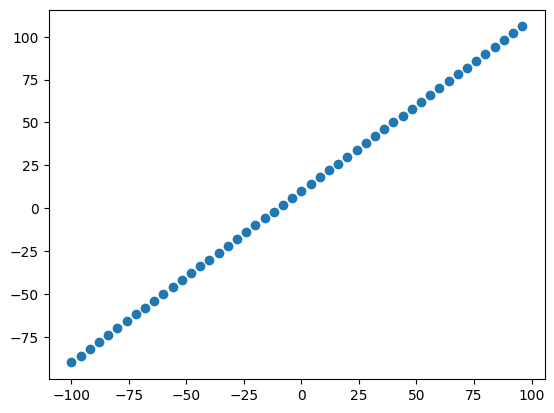

In [20]:
# Visualize the data 
import matplotlib.pyplot as plt

plt.scatter(X, y)

## The 3 sets...

 - **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester). <br>
 - **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam). <br>
 - Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [21]:
## The 3 sets...
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] # frist 40 samples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

## Visualizing the data

Now we've got our data in training and test sets..

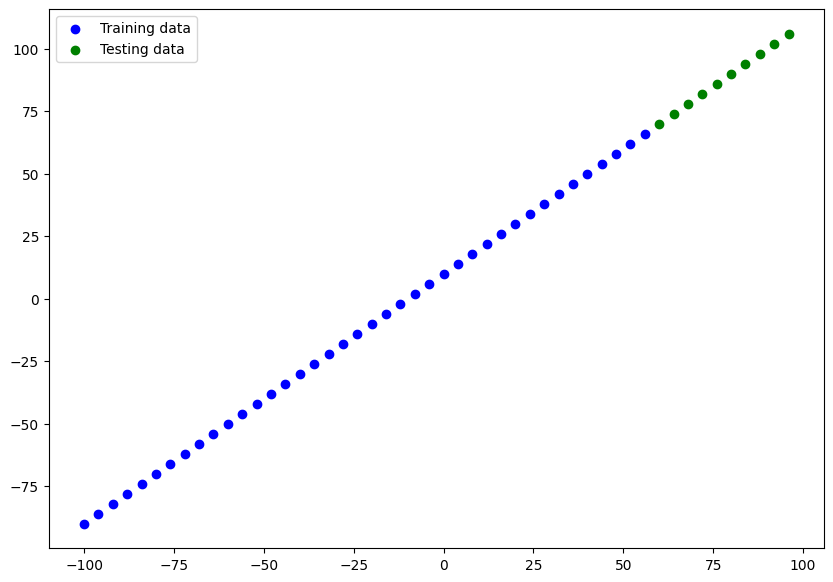

In [23]:
## Visusalizing the data
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [25]:
 # Building the neural network for our data

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling our model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
#model.fit(X_train, y_train, epochs=100)

## Visualzing the model


In [26]:
model.summary()

ValueError: ignored

In [51]:
# Let's create a model which builds automatically by defining the input shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# Compiling the model
model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


 - Total params - total number of parameters in the model.
 - Trainable parameters - these are the parameters (patterns) the model can update as it trains.
 - Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [53]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [54]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


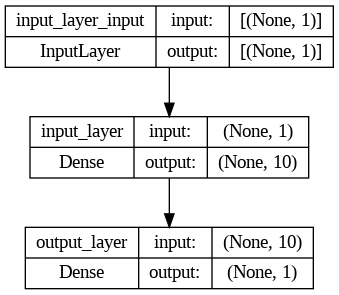

In [55]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions



In [56]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 70ms/step


array([[ 76.466225],
       [ 81.4471  ],
       [ 86.42796 ],
       [ 91.408844],
       [ 96.38971 ],
       [101.37059 ],
       [106.35146 ],
       [111.33234 ],
       [116.31322 ],
       [121.29408 ]], dtype=float32)

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [61]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot the testing data
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c='r', label="Preditions")
  plt.legend()

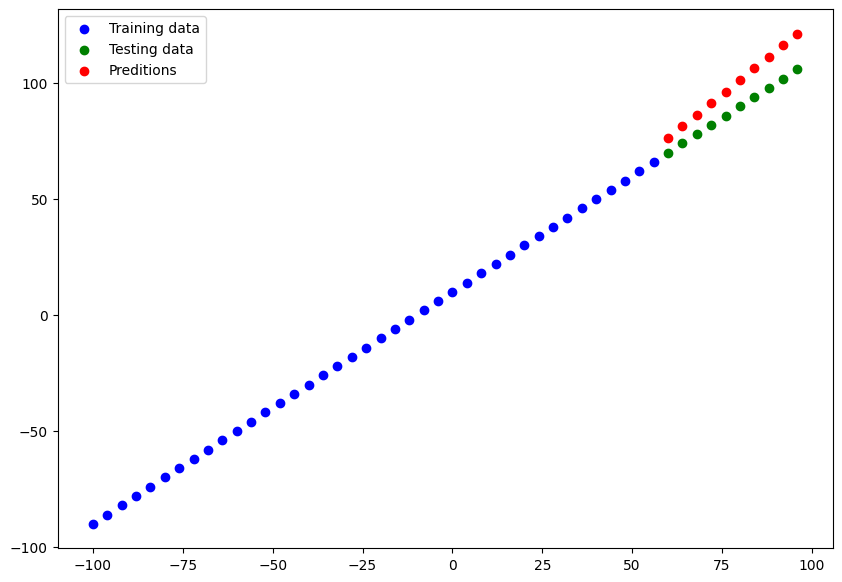

In [62]:
plot_predictions()

### Evaluating our model's predictions with the regression evalutation metrics.

Two of the main metrics used for regression problems are:

 - Mean absolute error (MAE) - the mean difference between each of the predictions.
 - Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [63]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 340ms/step - loss: 10.8802 - mae: 10.8802


[10.880152702331543, 10.880152702331543]